Overall Growth from 2018-12-01 to 2023-03-01: 777.1377014344265
Compound Annual Growth Rate (CAGR) from 2018-12-01 to 2023-03-01: 68.50603689511756


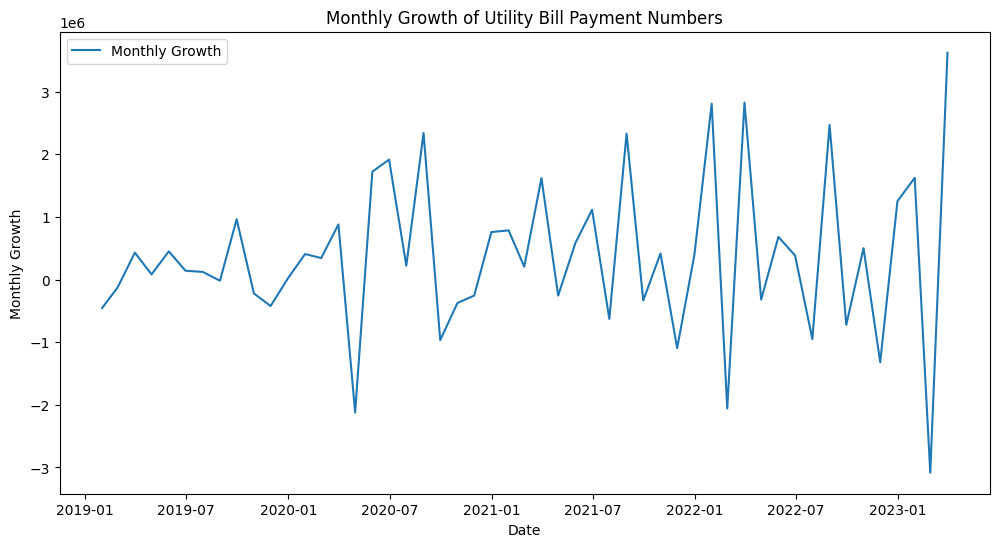

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1197.459, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1196.747, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1194.947, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1197.223, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1194.441, Time=0.14 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1195.331, Time=0.25 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1196.272, Time=0.65 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1195.933, Time=0.23 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=1197.674, Time=0.23 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1196.151, Time=0.11 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1199.700, Time=0.47 sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=1193.121, Time=0.05 sec
 ARIMA(0,0,1)(1,1,0)[12]             : AIC=1194.295, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12]

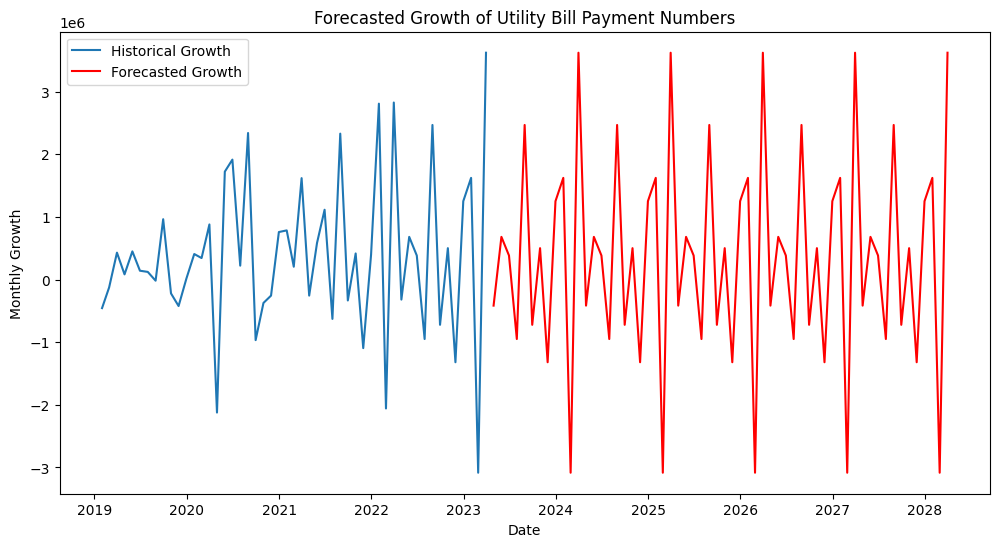

Total growth percentage over the last 5 years: 1289.99911125355


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Load data
data = {
    'Month': pd.date_range(start='2018-12', periods=52, freq='M'),
    'Utility Bill Payment Number': [
        1940706, 1485238, 1359828, 1789813, 1873057, 2323289, 2464879, 2587420, 2569778,
        3533667, 3312729, 2890446, 2907879, 3316038, 3659798, 4540077, 2417042, 4140390,
        6056004, 6278475, 8618897, 7652363, 7279419, 7023577, 7782723, 8568148, 8773733,
        10393490, 10137829, 10721924, 11836757, 11209070, 13539273, 13205968, 13623062,
        12528718, 12926599, 15735479, 13677638, 16504602, 16185233, 16867277, 17251409,
        16302345, 18770962, 18048792, 18550483, 17230712, 18482189, 20106328, 17022664,
        20644795
    ]
}

df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

# Calculate overall growth from December 2018 to March 2023
filtered_df = df['Utility Bill Payment Number'].loc['2018-12-01':'2023-03-01']
overall_growth = ((filtered_df.iloc[-1] - filtered_df.iloc[0]) / filtered_df.iloc[0]) * 100

# Calculate CAGR from December 2018 to March 2023
years = (filtered_df.index[-1] - filtered_df.index[0]).days / 365.25
initial_value = filtered_df.iloc[0]
final_value = filtered_df.iloc[-1]
cagr = ((final_value / initial_value) ** (1 / years)) - 1
cagr_percentage = cagr * 100

print("Overall Growth from 2018-12-01 to 2023-03-01:", overall_growth)
print("Compound Annual Growth Rate (CAGR) from 2018-12-01 to 2023-03-01:", cagr_percentage)

# Calculate monthly growth
df['Growth'] = df['Utility Bill Payment Number'].diff()
df.dropna(inplace=True)

# Plot the stationary data
plt.figure(figsize=(12, 6))
plt.plot(df['Growth'], label='Monthly Growth')
plt.title('Monthly Growth of Utility Bill Payment Numbers')
plt.xlabel('Date')
plt.ylabel('Monthly Growth')
plt.legend()
plt.show()

# Fit ARIMA model
model = auto_arima(df['Growth'], seasonal=True, m=12, stepwise=True, trace=True)

# Forecast next 60 months (5 years)
forecast = model.predict(n_periods=60)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=60, freq='M')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

print(forecast_df.head())

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Growth'], label='Historical Growth')
plt.plot(forecast_df, label='Forecasted Growth', color='red')
plt.title('Forecasted Growth of Utility Bill Payment Numbers')
plt.xlabel('Date')
plt.ylabel('Monthly Growth')
plt.legend()
plt.show()

# Calculate total growth percentage over the last 5 years
initial_value = df['Utility Bill Payment Number'].iloc[0]
latest_value = df['Utility Bill Payment Number'].iloc[-1]
total_growth_percentage = ((latest_value - initial_value) / initial_value) * 100
print("Total growth percentage over the last 5 years:", total_growth_percentage)
